Importación de librerias necesarias

In [ ]:
import json
import pandas as pd
import os

Extrayendo las ID de los partidos con los archivo de la carpeta data

In [ ]:
def extraer_ids_de_json(archivo_json):
    try:
        with open(archivo_json, 'r', encoding='utf-8') as f:
            data = json.load(f)

        if not data or 'events' not in data:
            print(f"  {archivo_json}: No contiene eventos")
            return []

        partidos = []
        for evento in data['events']:
            partido = {
                'ID': evento.get('id'),
                'Fecha': evento.get('roundInfo', {}).get('round'),
                'Equipo_Local': evento.get('homeTeam', {}).get('name'),
                'Equipo_Visitante': evento.get('awayTeam', {}).get('name'),
                'Goles_Local': evento.get('homeScore', {}).get('current'),
                'Goles_Visitante': evento.get('awayScore', {}).get('current'),
                'Link_Estadisticas': f"https://www.sofascore.com/api/v1/event/{evento.get('id')}/statistics"
            }
            partidos.append(partido)

        return partidos

    except FileNotFoundError:
        print(f"No se encontró: {archivo_json}")
        return []
    except json.JSONDecodeError:
        print(f"Error al leer JSON: {archivo_json}")
        return []

In [ ]:

print("=" * 100)
print("RECOLECTANDO IDs DE TODAS LAS FECHAS")
print("=" * 100)


todos_los_partidos = []
total_fechas_procesadas = 0

for num_fecha in range(1, 31):
    nombre_archivo = f'{num_fecha}.json'

    if os.path.exists(nombre_archivo):
        print(f"Procesando: {nombre_archivo}")
        partidos = extraer_ids_de_json(nombre_archivo)

        if partidos:
            todos_los_partidos.extend(partidos)
            total_fechas_procesadas += 1
            print(f" {len(partidos)} partidos encontrados\n")
        else:
            print(f"Sin datos\n")
    else:
        print(f"Saltando {nombre_archivo} (no encontrado)\n")

print("=" * 100)
print(f" PROCESO COMPLETADO")
print(f"Fechas procesadas: {total_fechas_procesadas}/30")
print(f"Total de partidos: {len(todos_los_partidos)}")
print("=" * 100)


🔍 RECOLECTANDO IDs DE TODAS LAS FECHAS
📂 Procesando: 1.json
   ✅ 8 partidos encontrados

📂 Procesando: 2.json
   ✅ 8 partidos encontrados

📂 Procesando: 3.json
   ✅ 8 partidos encontrados

📂 Procesando: 4.json
   ✅ 9 partidos encontrados

📂 Procesando: 5.json
   ✅ 9 partidos encontrados

📂 Procesando: 6.json
   ✅ 8 partidos encontrados

📂 Procesando: 7.json
   ✅ 9 partidos encontrados

📂 Procesando: 8.json
   ✅ 8 partidos encontrados

📂 Procesando: 9.json
   ✅ 8 partidos encontrados

📂 Procesando: 10.json
   ✅ 8 partidos encontrados

📂 Procesando: 11.json
   ✅ 8 partidos encontrados

📂 Procesando: 12.json
   ✅ 8 partidos encontrados

📂 Procesando: 13.json
   ✅ 8 partidos encontrados

📂 Procesando: 14.json
   ✅ 8 partidos encontrados

📂 Procesando: 15.json
   ✅ 8 partidos encontrados

📂 Procesando: 16.json
   ✅ 8 partidos encontrados

📂 Procesando: 17.json
   ✅ 8 partidos encontrados

📂 Procesando: 18.json
   ✅ 8 partidos encontrados

📂 Procesando: 19.json
   ✅ 9 partidos encontrados

📂

Creacion de HTML para obtener el link directo de la API los partidos y descargarlos manualmente.

In [ ]:
if todos_los_partidos:
    df_completo = pd.DataFrame(todos_los_partidos)

    print("\n" + "=" * 100)
    print("📋 RESUMEN DE PARTIDOS")
    print("=" * 100)
    print(df_completo[['ID', 'Fecha', 'Equipo_Local', 'Goles_Local',
                        'Goles_Visitante', 'Equipo_Visitante']].to_string(index=False))

    df_completo.to_csv('todos_los_partidos.csv', index=False, encoding='utf-8-sig', sep=';')
    print(f"\nCSV guardado: todos_los_partidos.csv")

    with open('links_estadisticas.txt', 'w', encoding='utf-8') as f:
        for idx, row in df_completo.iterrows():
            f.write(f"{row['Link_Estadisticas']}\n")

    print(f"Links guardados: links_estadisticas.txt")

    print("\n" + "=" * 100)
    print("LINKS DIRECTOS PARA DESCARGAR ESTADÍSTICAS (240 PARTIDOS)")
    print("=" * 100)
    print("Copia estos links y ábrelos en tu navegador para descargar las estadísticas:\n")

    for idx, row in df_completo.iterrows():
        print(f"Fecha {row['Fecha']:2d} | ID: {row['ID']} | {row['Equipo_Local']} vs {row['Equipo_Visitante']}")
        print(f"         {row['Link_Estadisticas']}")
        print()

    print("=" * 100)
    print("TODOS LOS LINKS HAN SIDO GENERADOS")
    print("=" * 100)

else:
    print("\nNo se encontraron partidos. Verifica que los archivos JSON estén subidos correctamente.")


In [ ]:
if todos_los_partidos:
    print("\n📊 DataFrame completo con todos los partidos:")
    display(df_completo)

NameError: name 'todos_los_partidos' is not defined

Revisa los archivos de las fechas de los partidos y todos los partidos jugados en 2025 y extrae los datos necesarios para el dataset y tambien hace un join en el dataset usando las ids

In [ ]:
BASE_PATH_ROUNDS = '/content/2025/'
BASE_PATH_STATS = '/content/data/'
OUTPUT_FILE = 'liga_chile_2025_dataset_completo.csv'
NUM_ROUNDS = 30

def extract_match_data(events):
    """
    Extrae datos generales del partido.
    AJUSTE: Si el marcador 'current' no está presente (ej. partido pospuesto),
    asigna el valor -1 para evitar 'None' o un fallo.
    """
    match_list = []
    for event in events:
        home_score = event.get('homeScore', {}).get('current', -1)
        away_score = event.get('awayScore', {}).get('current', -1)

        match_data = {
            'ID_Partido': event['id'],
            'Jornada': event['roundInfo']['round'],
            'Fecha_Timestamp': event['startTimestamp'],
            'Equipo_Local': event['homeTeam']['name'],
            'Goles_Local': home_score,
            'Equipo_Visitante': event['awayTeam']['name'],
            'Goles_Visitante': away_score
        }
        match_list.append(match_data)
    return match_list

def extract_detailed_statistics(match_id, round_num):
    """Carga y extrae estadísticas detalladas (Posesión, Disparos, Corners)."""
    stats_file_name = f'fecha_{round_num}_{match_id}.json'
    stats_file_path = os.path.join(BASE_PATH_STATS, stats_file_name)

    stats = {
        'Posesion_Local': None, 'Posesion_Visitante': None,
        'Disparos_a_Puerta_Local': None, 'Disparos_a_Puerta_Visitante': None,
        'Disparos_Totales_Local': None, 'Disparos_Totales_Visitante': None,
        'Corners_Local': None, 'Corners_Visitante': None
    }

    if not os.path.exists(stats_file_path):
        if round_num <= 2 or round_num >= 29:
            print(f"Advertencia: Archivo de estadísticas no encontrado para el partido {match_id} (Jornada {round_num}).")
        return stats

    try:
        with open(stats_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        all_stats = next((s for s in data['statistics'] if s['period'] == 'ALL'), None)

        if all_stats:
            stats_items = []
            for group in all_stats['groups']:
                stats_items.extend(group['statisticsItems'])

            for item in stats_items:
                key = item['key']
                if key == 'ballPossession':
                    stats['Posesion_Local'] = item['homeValue']
                    stats['Posesion_Visitante'] = item['awayValue']
                elif key == 'shotsOnGoal':
                    stats['Disparos_a_Puerta_Local'] = item['homeValue']
                    stats['Disparos_a_Puerta_Visitante'] = item['awayValue']
                elif key == 'totalShotsOnGoal' and item['name'] == 'Total shots':
                    stats['Disparos_Totales_Local'] = item['homeValue']
                    stats['Disparos_Totales_Visitante'] = item['awayValue']
                elif key == 'cornerKicks':
                    stats['Corners_Local'] = item['homeValue']
                    stats['Corners_Visitante'] = item['awayValue']

        return stats

    except Exception as e:
        print(f"Error al procesar el archivo {stats_file_path}: {e}")
        return stats

In [ ]:
final_data = []
processed_rounds = 0

print(f"Iniciando la consolidación de datos para {NUM_ROUNDS} jornadas...")

for i in range(1, NUM_ROUNDS + 1):
    round_file_path = os.path.join(BASE_PATH_ROUNDS, f'{i}.json')

    if not os.path.exists(round_file_path):
        print(f"Error CRÍTICO: No se encontró el archivo de la Jornada {i} en la ruta: {round_file_path}")
        continue

    try:
        with open(round_file_path, 'r', encoding='utf-8') as f:
            jornada_data = json.load(f)

        matches = extract_match_data(jornada_data['events'])

        for match in matches:
            match_id = match['ID_Partido']
            round_num = match['Jornada']

            detailed_stats = extract_detailed_statistics(match_id, round_num)
            final_data.append({**match, **detailed_stats})

        processed_rounds += 1

    except Exception as e:
        print(f"Ocurrió un error al procesar la Jornada {i}: {e}")

if final_data:
    df = pd.DataFrame(final_data)

    df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Timestamp'], unit='s', errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
    df = df.drop(columns=['Fecha_Timestamp'])

    column_order = [
        'ID_Partido', 'Jornada', 'Fecha_Hora',
        'Equipo_Local', 'Goles_Local',
        'Equipo_Visitante', 'Goles_Visitante',
        'Posesion_Local', 'Posesion_Visitante',
        'Disparos_Totales_Local', 'Disparos_Totales_Visitante',
        'Disparos_a_Puerta_Local', 'Disparos_a_Puerta_Visitante',
        'Corners_Local', 'Corners_Visitante'
    ]
    df = df[column_order]

    df.to_csv(OUTPUT_FILE, index=False)

    print("\n--- Proceso Completado ---")
    print(f"Total de jornadas procesadas con éxito: {processed_rounds}")
    print(f"Total de partidos en el dataset: {len(df)}")
    print(f"Dataset creado exitosamente: {OUTPUT_FILE}")
    print("\nPrimeras 12 filas del dataset (revisar Goles con -1):")
    print(df.head(12).to_markdown(index=False))

Iniciando la consolidación de datos para 30 jornadas...
Advertencia: Archivo de estadísticas no encontrado para el partido 13443470 (Jornada 29).

--- Proceso Completado ---
Total de jornadas procesadas con éxito: 30
Total de partidos en el dataset: 246
Dataset creado exitosamente: liga_chile_2025_dataset_completo.csv

Primeras 12 filas del dataset (revisar Goles con -1):
|   ID_Partido |   Jornada | Fecha_Hora          | Equipo_Local         |   Goles_Local | Equipo_Visitante        |   Goles_Visitante |   Posesion_Local |   Posesion_Visitante |   Disparos_Totales_Local |   Disparos_Totales_Visitante |   Disparos_a_Puerta_Local |   Disparos_a_Puerta_Visitante |   Corners_Local |   Corners_Visitante |
|-------------:|----------:|:--------------------|:---------------------|--------------:|:------------------------|------------------:|-----------------:|---------------------:|-------------------------:|-----------------------------:|--------------------------:|--------------------------

Filtro para los partidos aplazados y suspendindos con marcador "-1" creando otro archivo para almacenar el dataset para usar de entrenamiento

In [ ]:
INPUT_FILE = '/content/liga_chile_2025_dataset_completo.csv'
OUTPUT_FILE_CLEAN = 'liga_chile_2025_dataset_limpio.csv'

try:
    df = pd.read_csv(INPUT_FILE)

    partidos_iniciales = len(df)
    print(f"Total de partidos ANTES del filtro: {partidos_iniciales}")

    df['Goles_Local'] = pd.to_numeric(df['Goles_Local'], errors='coerce')
    df['Goles_Visitante'] = pd.to_numeric(df['Goles_Visitante'], errors='coerce')

    df_limpio = df[
        (df['Goles_Local'] != -1) &
        (df['Goles_Visitante'] != -1)
    ].copy()

    df_limpio.to_csv(OUTPUT_FILE_CLEAN, index=False)

    partidos_finales = len(df_limpio)

    print("\n--- Proceso de Filtrado Completado ---")
    print(f"Total de partidos después de la limpieza: {partidos_finales}")
    print(f"Partidos eliminados (incompletos o pospuestos): {partidos_iniciales - partidos_finales}")
    print(f"Dataset limpio creado exitosamente: {OUTPUT_FILE_CLEAN}")

    print("\nPrimeras filas del dataset limpio (solo partidos finalizados):")
    print(df_limpio.head(10).to_markdown(index=False))

except FileNotFoundError:
    print(f"\nError: No se encontró el archivo de entrada '{INPUT_FILE}'.")
    print("Por favor, verifica la ruta o el nombre del archivo.")
except Exception as e:
    print(f"\nOcurrió un error inesperado durante el filtrado: {e}")

**Entrenamiento al modelo con Random Forest con el dataset ya terminado**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
INPUT_FILE = '/content/liga_chile_2025_dataset_limpio.csv'

In [ ]:
df = pd.read_csv(INPUT_FILE)

In [ ]:
df

,ID_Partido,Jornada,Fecha_Hora,Equipo_Local,Goles_Local,Equipo_Visitante,Goles_Visitante,Posesion_Local,Posesion_Visitante,Disparos_Totales_Local,Disparos_Totales_Visitante,Disparos_a_Puerta_Local,Disparos_a_Puerta_Visitante,Corners_Local,Corners_Visitante
0,13368977,1,2025-02-15 00:00:00,Deportes Iquique,0,Coquimbo Unido,3,68.0,32.0,9.0,13.0,4.0,7.0,6.0,4.0
1,13368982,1,2025-02-15 21:00:00,O'Higgins,0,Huachipato,0,54.0,46.0,22.0,8.0,4.0,2.0,13.0,2.0
2,13368976,1,2025-02-15 21:00:00,Palestino,2,Cobresal,1,62.0,38.0,14.0,14.0,7.0,6.0,2.0,5.0
3,13368981,1,2025-02-15 23:30:00,Universidad de Chile,5,Ñublense,0,67.0,33.0,36.0,5.0,14.0,0.0,15.0,2.0
4,13368975,1,2025-02-16 15:00:00,Deportes La Serena,1,Colo Colo,3,41.0,59.0,7.0,15.0,2.0,6.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,13443481,30,2025-12-06 21:00:00,Deportes Limache,1,Deportes La Serena,0,72.0,28.0,10.0,9.0,7.0,1.0,4.0,3.0
236,13443483,30,2025-12-06 21:00:00,O'Higgins,1,Everton de Viña del Mar,0,75.0,25.0,11.0,4.0,4.0,3.0,3.0,1.0
237,13443476,30,2025-12-06 21:00:00,Universidad Católica,2,Unión La Calera,1,63.0,37.0,13.0,7.0,6.0,2.0,8.0,3.0
238,13443475,30,2025-12-07 21:00:00,Colo Colo,1,Audax Italiano,2,73.0,27.0,31.0,5.0,11.0,2.0,15.0,1.0


In [ ]:
def determine_result(row):
        if row['Goles_Local'] > row['Goles_Visitante']:
            return 1
        elif row['Goles_Local'] == row['Goles_Visitante']:
            return 2
        else:
            return 3

df['Target'] = df.apply(determine_result, axis=1)

In [ ]:
display(df.head())

,ID_Partido,Jornada,Fecha_Hora,Equipo_Local,Goles_Local,Equipo_Visitante,Goles_Visitante,Posesion_Local,Posesion_Visitante,Disparos_Totales_Local,Disparos_Totales_Visitante,Disparos_a_Puerta_Local,Disparos_a_Puerta_Visitante,Corners_Local,Corners_Visitante,Target
0,13368977,1,2025-02-15 00:00:00,Deportes Iquique,0,Coquimbo Unido,3,68.0,32.0,9.0,13.0,4.0,7.0,6.0,4.0,3
1,13368982,1,2025-02-15 21:00:00,O'Higgins,0,Huachipato,0,54.0,46.0,22.0,8.0,4.0,2.0,13.0,2.0,2
2,13368976,1,2025-02-15 21:00:00,Palestino,2,Cobresal,1,62.0,38.0,14.0,14.0,7.0,6.0,2.0,5.0,1
3,13368981,1,2025-02-15 23:30:00,Universidad de Chile,5,Ñublense,0,67.0,33.0,36.0,5.0,14.0,0.0,15.0,2.0,1
4,13368975,1,2025-02-16 15:00:00,Deportes La Serena,1,Colo Colo,3,41.0,59.0,7.0,15.0,2.0,6.0,5.0,5.0,3


In [ ]:
features = [
        'Posesion_Local', 'Posesion_Visitante',
        'Disparos_Totales_Local', 'Disparos_Totales_Visitante',
        'Disparos_a_Puerta_Local', 'Disparos_a_Puerta_Visitante',
        'Corners_Local', 'Corners_Visitante'
    ]

In [ ]:
df[features] = df[features].fillna(0)

X = df[features]
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.5625

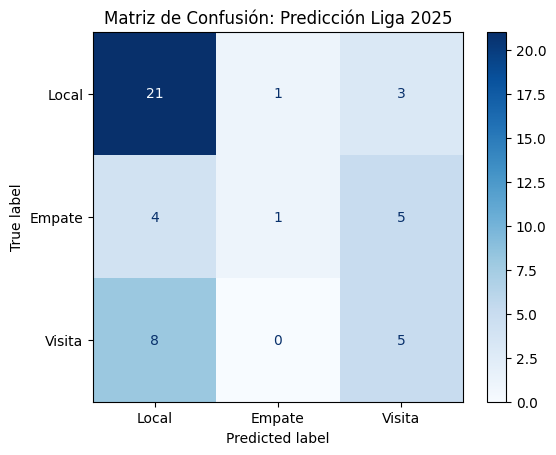


Reporte Detallado:
                precision    recall  f1-score   support

    Gana Local       0.64      0.84      0.72        25
        Empate       0.50      0.10      0.17        10
Gana Visitante       0.38      0.38      0.38        13

      accuracy                           0.56        48
     macro avg       0.51      0.44      0.43        48
  weighted avg       0.54      0.56      0.52        48



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Local', 'Empate', 'Visita'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: Predicción Liga 2025")
plt.show()

print("\nReporte Detallado:")
print(classification_report(y_test, y_pred, target_names=['Gana Local', 'Empate', 'Gana Visitante']))